Linear Kernel

Accuracy score  1.0


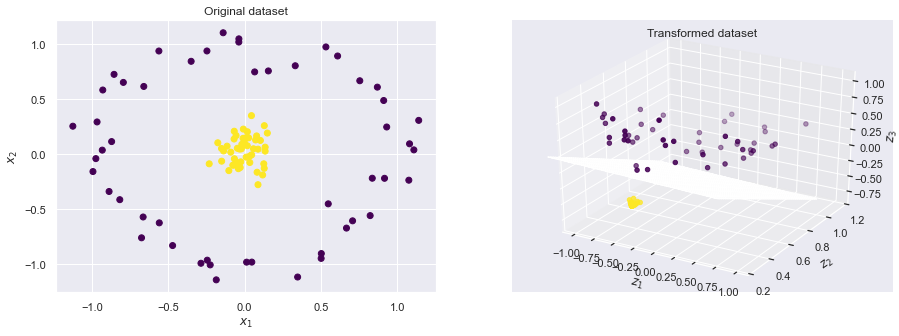

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets.samples_generator import make_circles

def feature_map_1(X):
    return np.asarray(( np.sqrt(2) *X[:,0] * X[:,1], X[:,0]**2, X[:,1]**2)).T
X, y = make_circles(100, factor=.1, noise=.1)
Z = feature_map_1(X)
#2D scatter plot
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:,0], X[:,1], c = y, cmap = 'viridis')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Original dataset')

#3D scatter plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(Z[:,0],Z[:,1], Z[:,2],c = y, cmap = 'viridis' ) 
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_zlabel('$z_3$')
ax.set_title('Transformed dataset')

clf = svm.SVC(kernel = 'linear' , C = 1)
clf.fit(Z, y) 
w = clf.coef_.flatten()
b = clf.intercept_.flatten()
xx, yy = np.meshgrid(np.linspace(-1,1), np.linspace(0,1))
# calculate corresponding z
boundary = (-w[0] * xx - w[1] * yy - b) * 1. /w[2]
# plot the surface
ax.plot_surface(xx, yy, boundary, alpha = .3)
ax.set_ylim(.2,1.2)
ax.set_zlim(-.9,1.1)
print('Accuracy score ',accuracy_score(y, clf.predict(Z)))
plt.show()

Polynomial Kernel

Accuracy score  1.0


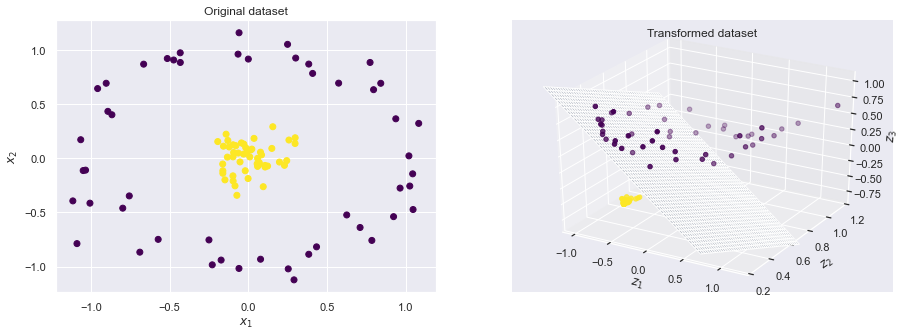

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from IPython.display import HTML, Image
%matplotlib inline
sns.set()
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets.samples_generator import make_circles

def feature_map_1(X):
    #return np.asarray((X[:,0], X[:,1], X[:,0]**2 + X[:,1]**2)).T
    return np.asarray(( np.sqrt(2) *X[:,0] * X[:,1], X[:,0]**2, X[:,1]**2)).T

X, y = make_circles(100, factor=.1, noise=.1)
Z = feature_map_1(X)

#2D scatter plot
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:,0], X[:,1], c = y, cmap = 'viridis')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Original dataset')

#3D scatter plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(Z[:,0],Z[:,1], Z[:,2],c = y, cmap = 'viridis' ) 

#,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_zlabel('$z_3$')
ax.set_title('Transformed dataset')


clf = svm.SVC(kernel = 'poly' , C = 2)
clf.fit(Z, y) 

w = clf.dual_coef_.flatten()
b = clf.intercept_.flatten()
# create x,y
xx, yy = np.meshgrid(np.linspace(-1,1), np.linspace(0,1))
# calculate corresponding z
boundary = (-w[0] * xx - w[1] * yy - b) * 1. /w[2]

# plot the surface
ax.plot_surface(xx, yy, boundary, alpha = .3)
ax.set_ylim(.2,1.2)
ax.set_zlim(-.9,1.1)
#ax.view_init(0, 260)
print('Accuracy score ',accuracy_score(y, clf.predict(Z)))
#print (w,b)
plt.show()

RBF Kernel

AttributeError: 'GaussianProcessClassifier' object has no attribute 'dual_coef_'

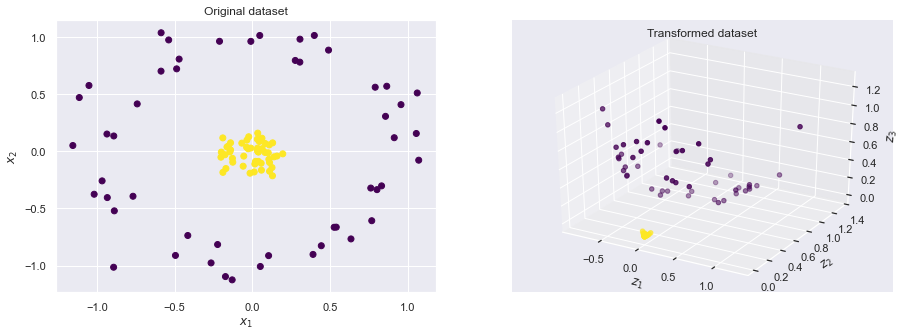

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from IPython.display import HTML, Image
%matplotlib inline
sns.set()
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets.samples_generator import make_circles
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

def feature_map_1(X):
    #return np.asarray((X[:,0], X[:,1], X[:,0]**2 + X[:,1]**2)).T
    return np.asarray(( np.sqrt(2) *X[:,0] * X[:,1], X[:,0]**2, X[:,1]**2)).T

X, y = make_circles(100, factor=.1, noise=.1)
Z = feature_map_1(X)

#2D scatter plot
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:,0], X[:,1], c = y, cmap = 'viridis')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Original dataset')

#3D scatter plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(Z[:,0],Z[:,1], Z[:,2],c = y, cmap = 'viridis' ) 

#,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_zlabel('$z_3$')
ax.set_title('Transformed dataset')

kernel = 5.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel)
gpc.fit(X, y)


w = gpc.dual_coef_.flatten()
b = gpc.intercept_.flatten()
# create x,y
xx, yy = np.meshgrid(np.linspace(-1,1), np.linspace(0,1))
# calculate corresponding z
boundary = (-w[0] * xx - w[1] * yy - b) * 1. /w[2]

# plot the surface
ax.plot_surface(xx, yy, boundary, alpha = .3)
ax.set_ylim(.2,1.2)
ax.set_zlim(-.9,1.1)
#ax.view_init(0, 260)
print('Accuracy score',accuracy_score(y, clf.predict(Z)))
plt.show()